In [15]:
# imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress completely unneccesary TensorFlow warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [16]:
#read the file 
df = pd.read_csv('Data/data.csv')
display(df.head(10))     #display part of the data
num_rows = df.shape[0]
df_columns = df.columns
print(df.shape)          #print feature and row number

,X1,X2,X3,X4,X5,Y
0,23.180,27.2720,426.0,721.250000,0.004793,1
1,23.150,27.2675,429.5,714.000000,0.004783,1
2,23.150,27.2450,426.0,713.500000,0.004779,1
3,23.150,27.2000,426.0,708.250000,0.004772,1
4,23.100,27.2000,426.0,704.500000,0.004757,1
5,23.100,27.2000,419.0,701.000000,0.004757,1
6,23.100,27.2000,419.0,701.666667,0.004757,1
7,23.100,27.2000,419.0,699.000000,0.004757,1
8,23.100,27.2000,419.0,689.333333,0.004757,1
9,23.075,27.1750,419.0,688.000000,0.004745,1


(8143, 6)


In [17]:
X = df.drop(columns=['Y']) 
# Target variable
y = df['Y'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# defineing model
model = Sequential()

model.add(Dense(5, input_shape=(X_train_scaled.shape[1],)))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(25))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

/home/guts/Documents/Projects/442 M2 Project/tf_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,981 (27.27 KB)

 Trainable params: 6,981 (27.27 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# early stopping alg
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [22]:
#Training
#model.fit(X_train_scaled, y_train, batch_size=15, epochs=5, verbose=1)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=25, epochs=50, verbose=1, callbacks=[early_stopping])

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9501 - loss: 0.1578 - val_accuracy: 0.9877 - val_loss: 0.0484
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0493 - val_accuracy: 0.9877 - val_loss: 0.0433
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0465 - val_accuracy: 0.9877 - val_loss: 0.0398
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0427 - val_accuracy: 0.9885 - val_loss: 0.0368
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0392 - val_accuracy: 0.9885 - val_loss: 0.0328
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9885 - val_loss: 0.0357
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0324 - val_accuracy: 0.9885 - val_loss: 0.0282
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0313 - val_accuracy: 0.

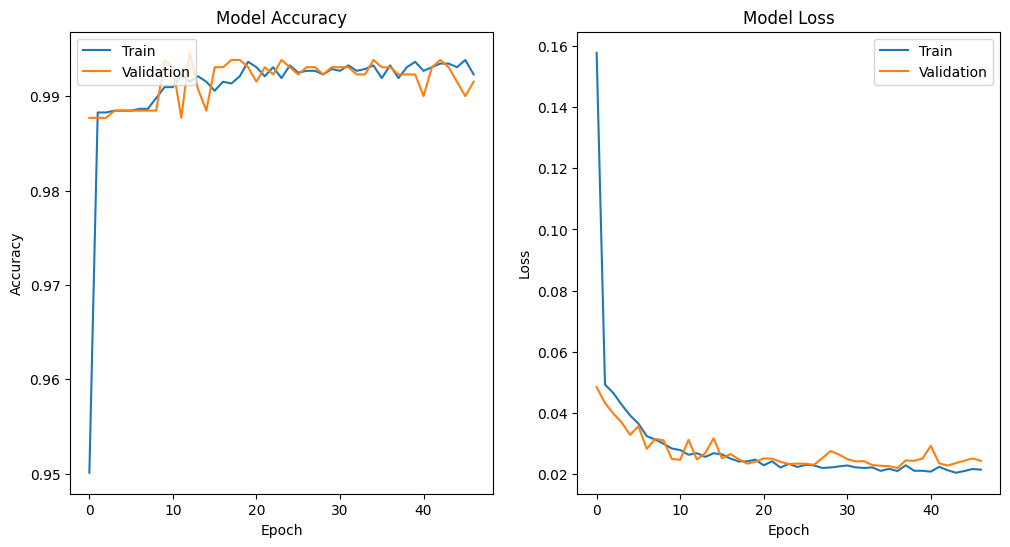

In [23]:
import matplotlib.pyplot as plt
#graphs
# accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [24]:
# Training accuracy
y_train_pred = model.predict(X_train_scaled)

# convert to binary
y_train_pred = (y_train_pred > 0.5).astype("int32")

# accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_train, y_train_pred))

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
Model accuracy: 99.39%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5128
           1       0.98      0.99      0.99      1386

    accuracy                           0.99      6514
   macro avg       0.99      0.99      0.99      6514
weighted avg       0.99      0.99      0.99      6514




- first intake the csvfile then separate to train and test set 80% 20%
- scale the test and train set
- based on analysing the model accuracy and value loss graphs 
  and accuracy score for training set and test set were initially low (68%), we can assume there is underfitting
- because of that created more layers and more neurons
- used relu for input and hidden layers.
- used sigmoid for output layer since it binary classifier
- increased training iterations 
- added the early stop function in case model stops inproving and it helps to avoid overfitting
- final accuracy 98.97%
